In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
import glob
files = glob.glob("./data/*gm*")
print(files)

['./data/gm2nearline_full_run16455.root', './data/gm2nearline_full_run16465.root', './data/gm2nearline_full_run16475.root', './data/gm2nearline_full_run16485.root', './data/gm2nearline_full_run16495.root', './data/gm2nearline_full_run16525.root', './data/gm2nearline_full_run16535.root', './data/gm2nearline_full_run16539.root', './data/gm2nearline_full_run16545.root', './data/gm2nearline_full_run16549.root', './data/gm2nearline_full_run16550.root', './data/gm2nearline_full_run16551.root', './data/gm2nearline_full_run16552.root', './data/gm2nearline_full_run16553.root', './data/gm2nearline_full_run16554.root', './data/gm2nearline_full_run16555.root', './data/gm2nearline_full_run16556.root', './data/gm2nearline_full_run16557.root', './data/gm2nearline_full_run16558.root', './data/gm2nearline_full_run16559.root', './data/gm2nearline_full_run16560.root', './data/gm2nearline_full_run16561.root', './data/gm2nearline_full_run16563.root', './data/gm2nearline_full_run16564.root', './data/gm2near

In [4]:
ctagCutoff = 100000

In [5]:
caloHists = [[] for x in range(24)]
runs = []
for file in files:
    run = int(file.split("run")[1].split(".")[0])
    print("Starting run:", run)
    try:
        f = r.TFile(file)
        hctag = f.Get("nearlineHistTree").Get("nearlineCTag").Clone("ctag")
        if(hctag.Integral() > ctagCutoff):
            for calo in range(1,25):
                #h = f.Get("nearlineHistTree").Get("calo"+str(calo)).Get("nXtalHits").Clone("h_"+str(run))            
                h = f.Get("nearlineHistTree").Get("calo"+str(calo)).Get("hitPositions").Clone("h_"+str(run))
                h.SetTitle("Hit Positions in Calo "+str(calo)+" in Run "+str(run))
                h.SetDirectory(0)
                caloHists[calo-1].append(h)
            runs.append(run)
        else:
            print("    Laser run, skipping.")
        f.Close()   
    except:
        print("    ERROR: could not open/read file")

Starting run: 16455
Starting run: 16465
Starting run: 16475
Starting run: 16485
Starting run: 16495
Starting run: 16525
Starting run: 16535
Starting run: 16539
Starting run: 16545
Starting run: 16549
Starting run: 16550
Starting run: 16551
    Laser run, skipping.
Starting run: 16552
Starting run: 16553
Starting run: 16554
Starting run: 16555
Starting run: 16556
Starting run: 16557
Starting run: 16558
Starting run: 16559
Starting run: 16560
    Laser run, skipping.
Starting run: 16561
Starting run: 16563
    Laser run, skipping.
Starting run: 16564
Starting run: 16565
Starting run: 16566
    Laser run, skipping.
Starting run: 16568
    Laser run, skipping.
Starting run: 16569
    Laser run, skipping.
Starting run: 16570
    Laser run, skipping.
Starting run: 16571
    Laser run, skipping.
Starting run: 16572
    Laser run, skipping.
Starting run: 16573
    Laser run, skipping.
Starting run: 16574
    Laser run, skipping.
Starting run: 16575
    Laser run, skipping.
Starting run: 16576


In [6]:
calo2Hists = caloHists[1]

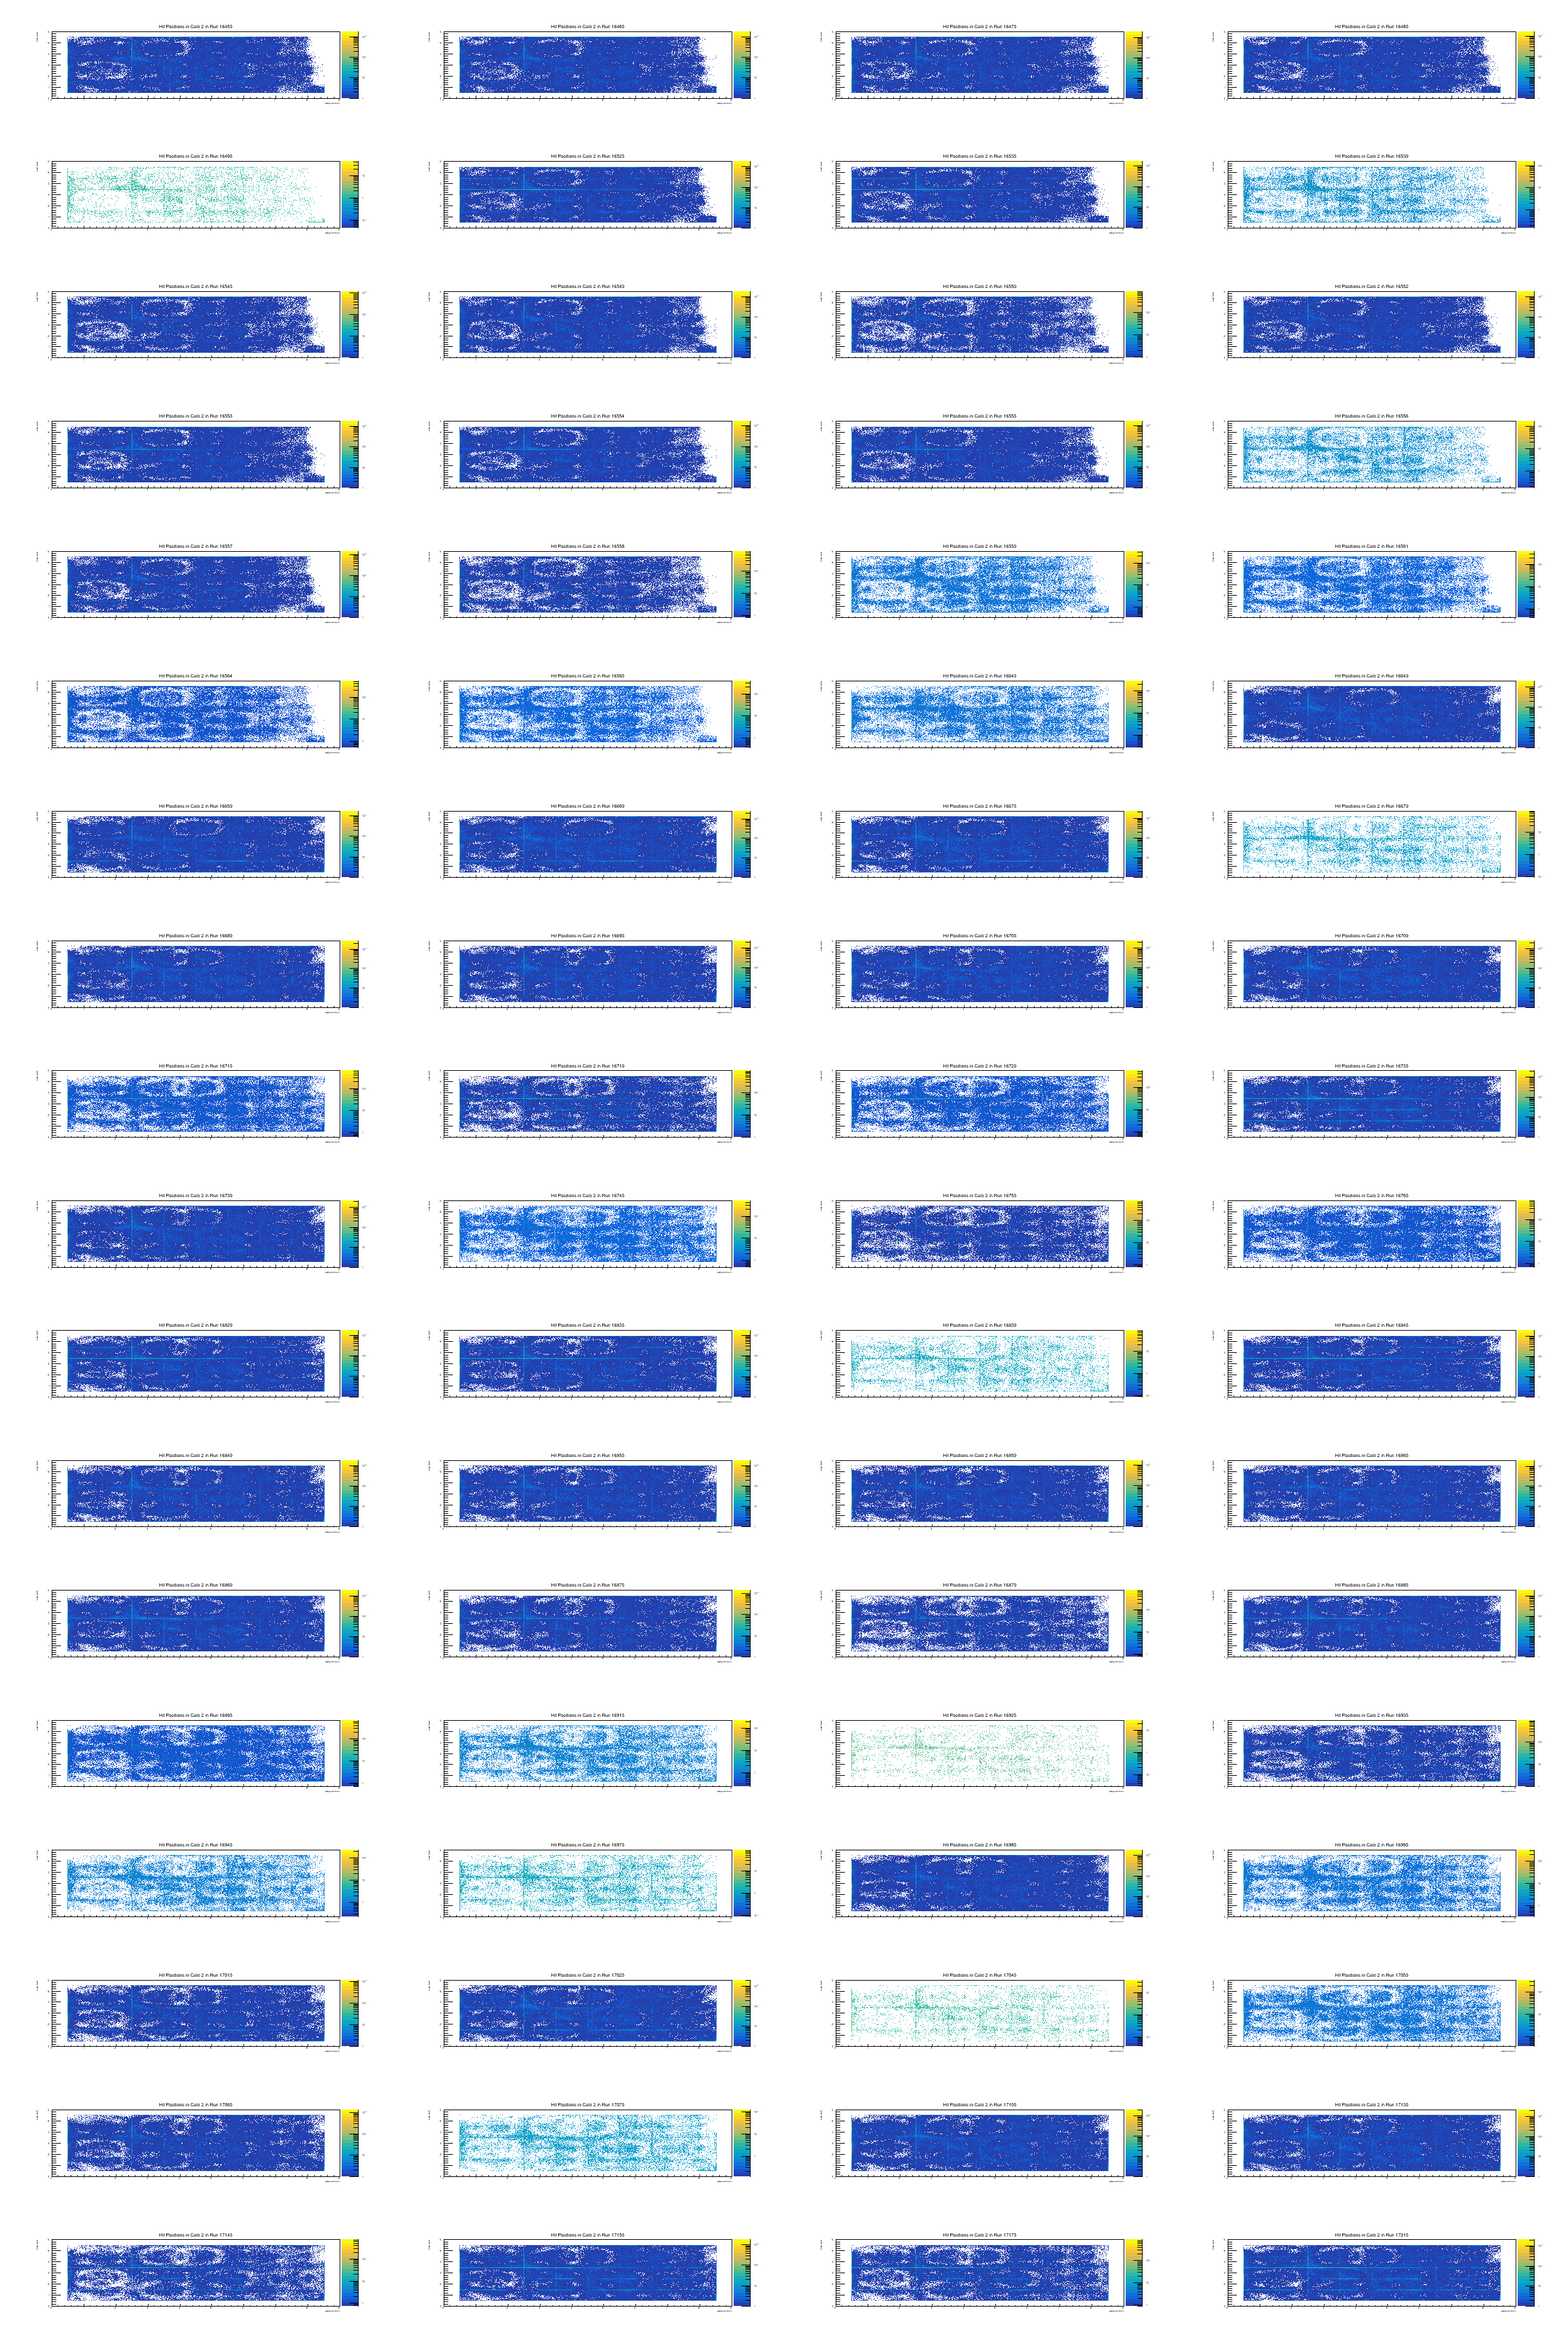

In [7]:
c = r.TCanvas("c","c",2400,3600)
nRow = 4
c.Divide(nRow, int(np.ceil(len(calo2Hists)/nRow)))
for i, h in enumerate(calo2Hists):
    c.cd(i+1)
    h.Draw("colz")
    r.gPad.SetLogz()
c.Draw()

In [8]:
meanX = [[] for x in range(24)]
errX = [[] for x in range(24)]
for i, caloi in enumerate(caloHists):
    for h in caloi:
        axis = 1
        #h.GetXaxis().SetRangeUser(0,4)
        meanXi = h.GetMean(axis)
        meanX[i].append(meanXi)
        errX[i].append(h.GetMean(axis+10))

In [9]:
def drawDatasetBoundaries(y):
    datasets = [ (16355, 16539, "9day"), (16669,16714,"Low Kick"), (16827, 16900,"Super Low Kick"), (16908,17528,"EndGame") ]
    for (r1, r2, name) in datasets:
        plt.plot([r1,r2],[y,y],"-",label=name,linewidth=7.0)

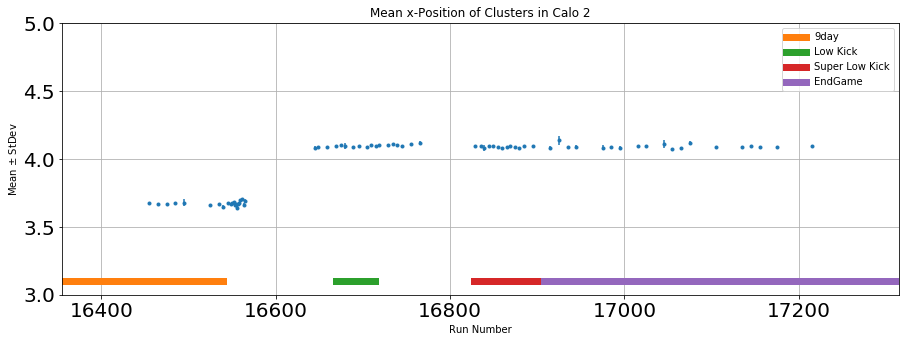

In [10]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(runs,meanX[1],yerr=errX[1],fmt=".")
plt.title("Mean x-Position of Clusters in Calo 2")
plt.xlabel("Run Number")
plt.ylabel(r"Mean $\pm$ StDev")
plt.ylim(0,6)
plt.grid()
drawDatasetBoundaries(3.1)
plt.xlim(runs[0] - 100, runs[len(runs)-1]+100)
plt.ylim(3,5)
#plt.xlim(16550,16600)
plt.legend()
plt.show()

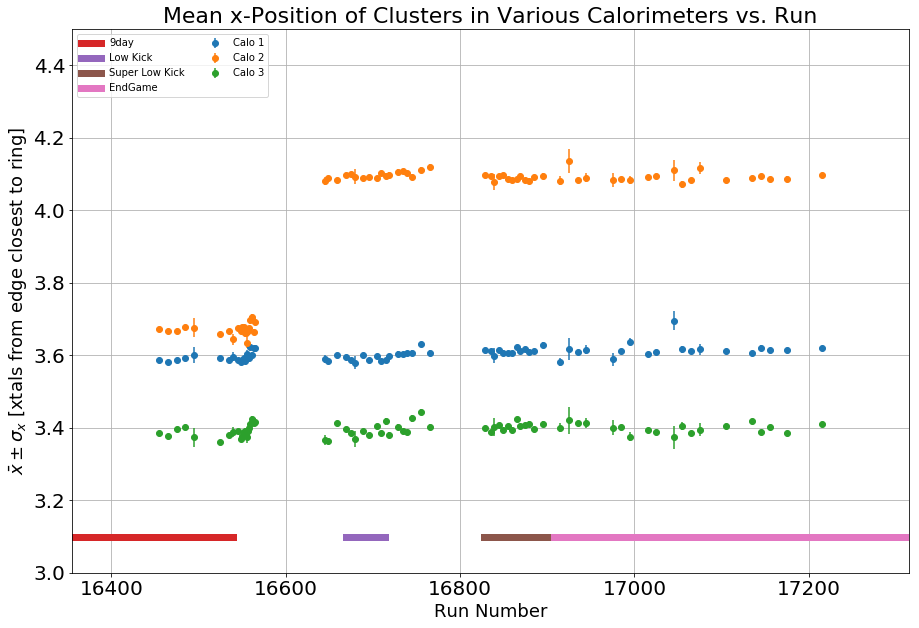

In [20]:
fig,ax = plt.subplots(figsize=(15,10))
for calo in range(1,4):
    plt.errorbar(runs,meanX[calo-1],yerr=errX[calo-1],label="Calo "+str(calo),fmt="o")
plt.title("Mean x-Position of Clusters in Various Calorimeters vs. Run",size=22)
plt.xlabel("Run Number", size=18)
plt.ylabel(r"$\bar{x} \pm \sigma_{x}$ [xtals from edge closest to ring]", size=18)
plt.ylim(0,6)
plt.grid()
drawDatasetBoundaries(3.1)
plt.xlim(runs[0] - 100, runs[len(runs)-1]+100)
#plt.xlim(16700,16720)
plt.ylim(3,4.5)
plt.legend(ncol=2,loc=2)
plt.show()

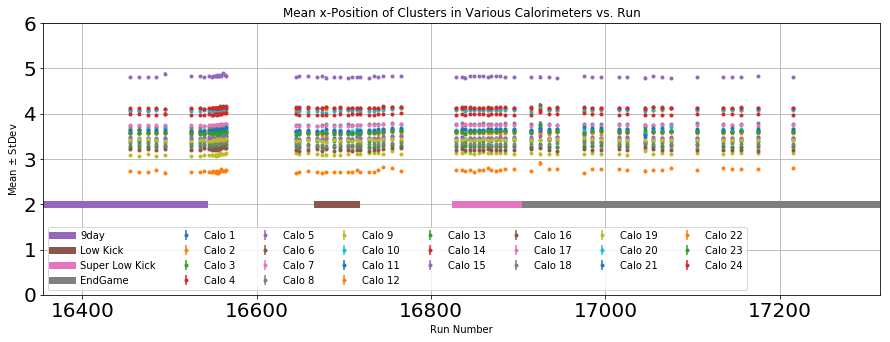

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
for calo in range(1,25):
    plt.errorbar(runs,meanX[calo-1],yerr=errX[calo-1],label="Calo "+str(calo),fmt=".")
plt.title("Mean x-Position of Clusters in Various Calorimeters vs. Run")
plt.xlabel("Run Number")
plt.ylabel(r"Mean $\pm$ StDev")
plt.ylim(0,6)
plt.grid()
drawDatasetBoundaries(2)
plt.xlim(runs[0] - 100, runs[len(runs)-1]+100)
#plt.ylim(3,4.5)
plt.legend(ncol=8,loc=3)
plt.show()

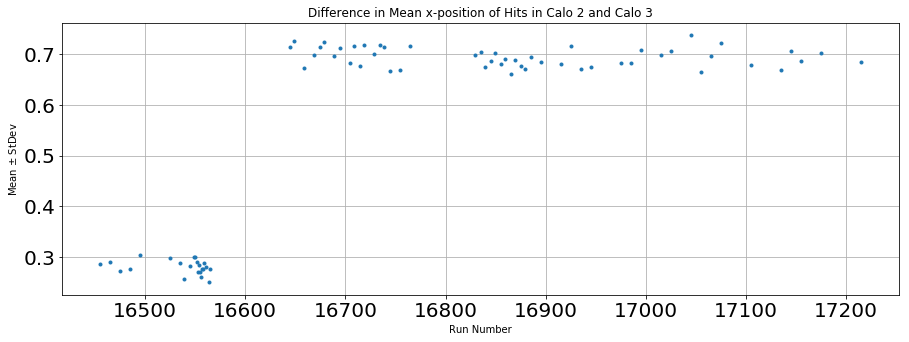

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(runs,[x - y for (x,y) in zip(meanX[1],meanX[2])],".")
plt.title("Difference in Mean x-position of Hits in Calo 2 and Calo 3")
plt.xlabel("Run Number")
plt.ylabel(r"Mean $\pm$ StDev")
#plt.ylim(-.5,2.5)
plt.grid()
plt.show()

In [13]:
df = pandas.read_csv("./data/test.csv",sep=";",header=None)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3073,2017-11-09 09:16:28.81844,testing updated WFD5 async firmware w/ crate 25,2017-09-25 10:13:34,1.716388e+14,2017-09-25 10:13:04,0.574034,Antoine,/data1/gm2,31.0,5.723126e+07,102763.0,T
1,3933,2017-11-04 07:53:41.348389,test run,2017-10-22 07:26:59,2.320985e+14,2017-10-22 07:02:01,0.995311,"Carlo Gabbanini, Dinko Pocanic",/data2/gm2,17569.0,2.820084e+11,161910.0,T
2,3634,2017-11-04 07:45:17.794019,shift runs,2017-10-16 20:26:13,1.986093e+14,2017-10-16 19:31:17,0.795738,Fang,/data2/gm2,77435.0,5.002177e+11,129637.0,T
3,3661,2017-11-04 07:46:16.214404,laser calibration,2017-10-18 16:33:14,2.048404e+14,2017-10-18 16:29:25,0.895635,Saskia,/data2/gm2,5190.0,4.503361e+10,135608.0,T
4,4022,2017-11-04 07:55:40.111612,test run,2017-10-24 05:40:21,2.489533e+14,2017-10-24 04:06:02,0.804864,"Midhat Farooq, Myeongjae Lee",/data2/gm2,66624.0,5.001264e+11,178293.0,T


In [15]:
import datetime
def returnTime(df, run):
    timeStr = df.loc[df[0] == run][1].iloc[0]
    #print(timeStr, type(timeStr))
    timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f"
    time = datetime.datetime.strptime(timeStr, timeFormatTemp)
    return time

In [16]:
times = []
for run in runs:
    times.append( returnTime(df, run) )

In [17]:
def drawDatasetBoundariesByTime(y):
    datasets = [ ( returnTime(df,16355), returnTime(df,16539), "9day"), 
                (returnTime(df,16669) , returnTime(df,16714) ,"Low Kick"), 
                (returnTime(df,16827), returnTime(df,16900),"Super Low Kick"), 
                (returnTime(df,16908),returnTime(df,17528),"EndGame") ]
    for (r1, r2, name) in datasets:
        plt.plot([r1,r2],[y,y],label=name,linewidth=7.0)

/home/jlab/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


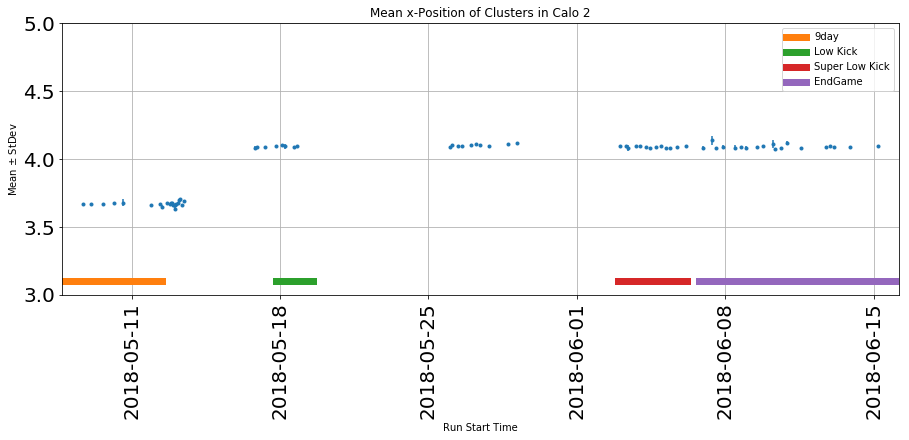

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(times,meanX[1],yerr=errX[1],fmt=".")
plt.title("Mean x-Position of Clusters in Calo 2")
plt.xlabel("Run Start Time")
plt.ylabel(r"Mean $\pm$ StDev")
plt.ylim(0,6)
plt.grid()

drawDatasetBoundariesByTime(3.1)
ts = datetime.timedelta(days=1)
plt.xlim(times[0]-ts, times[len(runs)-1]+ts)
plt.ylim(3,5)

plt.legend()
plt.xticks(rotation=90)
plt.show()

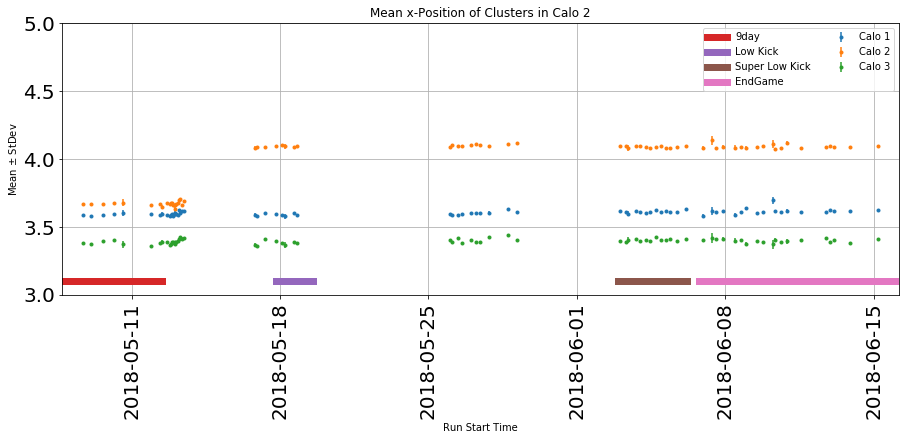

In [19]:
fig,ax = plt.subplots(figsize=(15,5))
for calo in range(1,4):
    plt.errorbar(times,meanX[calo-1],yerr=errX[calo-1],label="Calo "+str(calo),fmt=".")
plt.title("Mean x-Position of Clusters in Calo 2")
plt.xlabel("Run Start Time")
plt.ylabel(r"Mean $\pm$ StDev")
plt.ylim(0,6)
plt.grid()

drawDatasetBoundariesByTime(3.1)
ts = datetime.timedelta(days=1)
plt.xlim(times[0]-ts, times[len(runs)-1]+ts)
plt.ylim(3,5)

plt.legend(ncol=2)
plt.xticks(rotation=90)
plt.show()